In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
real_estate_df=pd.read_excel("Real estate valuation data set.xlsx")

In [3]:
real_estate_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [25]:
real_estate_df.rename(columns={"X1 transaction date":"Transaction Date","X2 house age":"House age","X3 distance to the nearest MRT station":"Distance to nearest MRT station","X4 number of convenience stores":"Convenience stores nearby",
                                "X5 latitude":"Latitude","X6 longitude":"Longitude","Y house price of unit area":"House price of unit area"},inplace=True)

In [26]:
real_estate_df.head()

,No,House age,Distance to nearest MRT station,convenince stores nearby,Latitude,Longitude,House price of unit area,Transaction Year,Transaction Month
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,2012,12
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,2012,12
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,2013,7
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,2013,7
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10


In [15]:
real_estate_df["Transaction Date"].dtype

dtype('float64')

In [16]:
def decimal_year_conversion(decimal_year):
    year=int(decimal_year)
    return year

def get_month(decimal_year):
    year=int(decimal_year)
    month=((decimal_year-year)*12)+1
    return month

In [17]:
real_estate_df["Transaction Year"]=real_estate_df["Transaction Date"].apply(decimal_year_conversion)
real_estate_df["Transaction Month"]=real_estate_df["Transaction Date"].apply(get_month)

In [18]:
real_estate_df.head()

,No,Transaction Date,House age,Distance to nearest MRT station,convenince stores nearby,Latitude,Longitude,House price of unit area,Transaction Year,Transaction Month
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2012,12.0
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2012,12.0
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2013,8.0
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2013,7.0
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2012,11.0


In [19]:
real_estate_df.drop("Transaction Date",axis=1,inplace=True)
real_estate_df["Transaction Month"]=real_estate_df["Transaction Month"].astype(int)

In [24]:
real_estate_df.head()

,No,House age,Distance to nearest MRT station,convenince stores nearby,Latitude,Longitude,House price of unit area,Transaction Year,Transaction Month
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,2012,12
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,2012,12
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,2013,7
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,2013,7
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10


<Figure size 1500x1500 with 0 Axes>

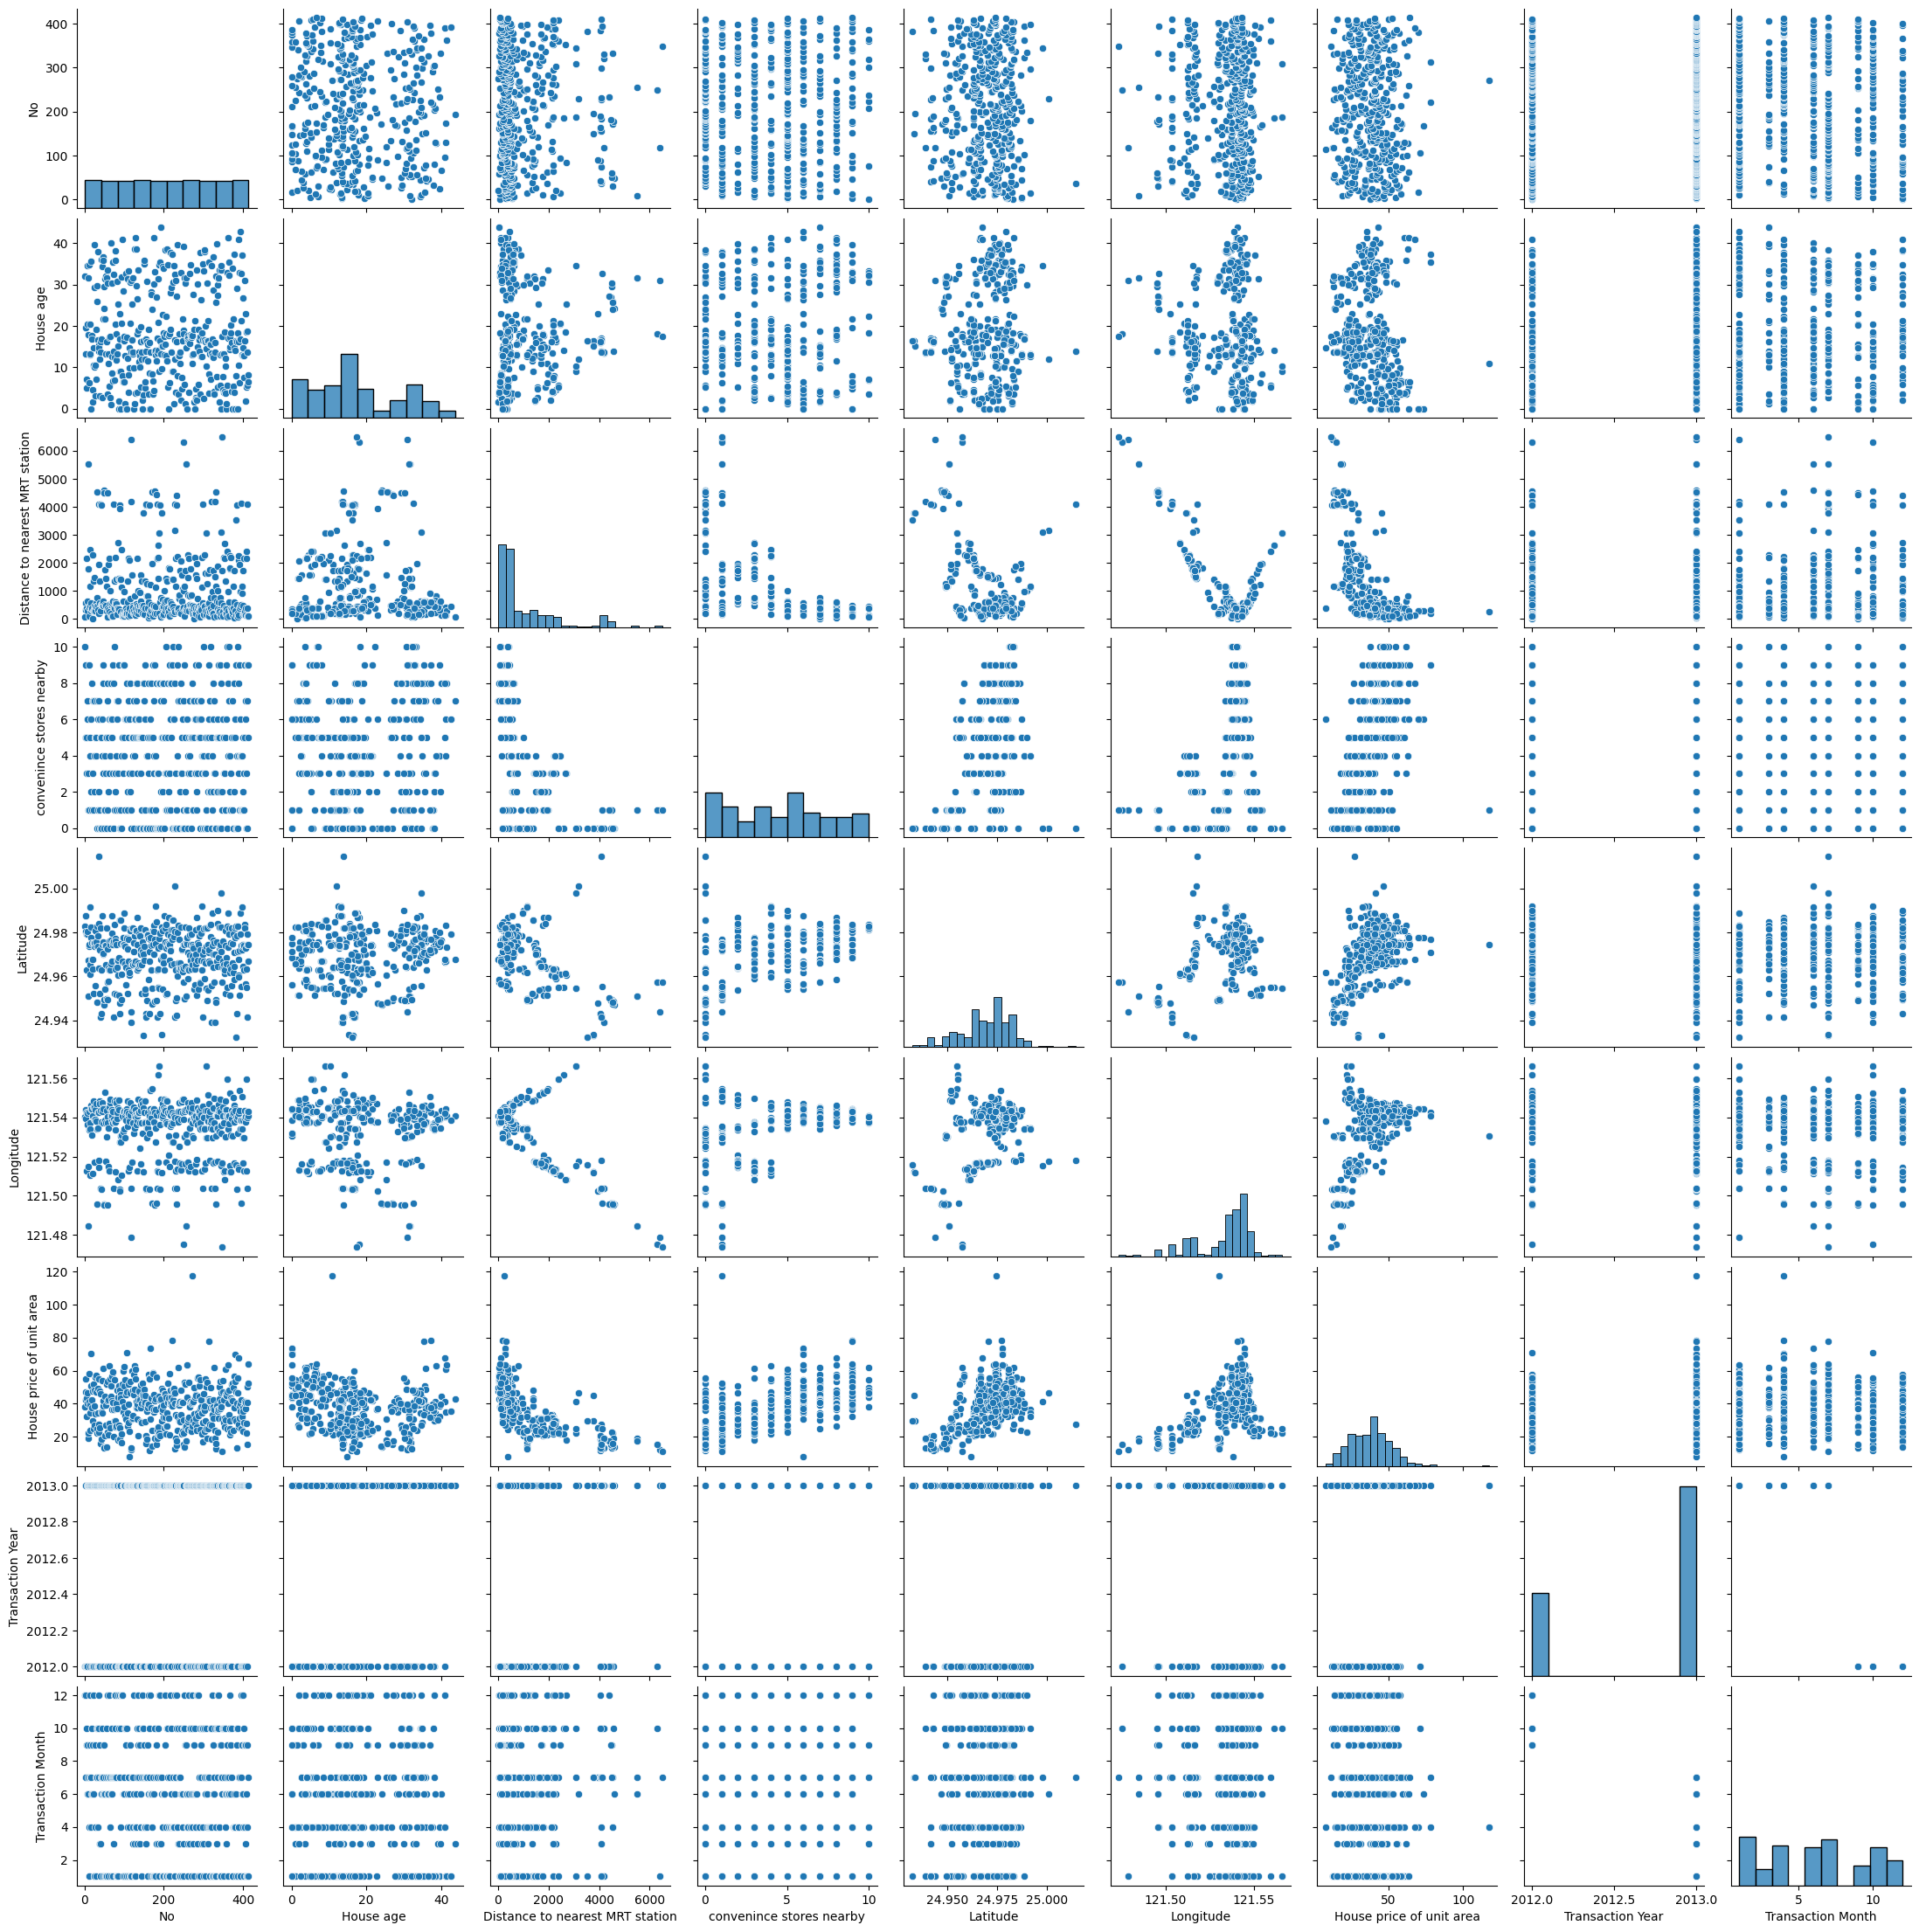

In [27]:
plt.figure(figsize=(15,15))
sns.pairplot(real_estate_df)
plt.show()

In [28]:
corr_vals=real_estate_df.corr()
corr_vals

,No,House age,Distance to nearest MRT station,convenince stores nearby,Latitude,Longitude,House price of unit area,Transaction Year,Transaction Month
No,1.000000,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587,0.007379,-0.058143
House age,-0.032808,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567,0.049171,-0.064605
Distance to nearest MRT station,-0.013573,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613,0.016519,0.040856
convenince stores nearby,-0.012699,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005,-0.005586,0.022800
Latitude,-0.010110,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307,0.008118,0.017083
Longitude,-0.011059,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287,0.013177,-0.065684
House price of unit area,-0.028587,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000,0.081545,-0.054210
Transaction Year,0.007379,0.049171,0.016519,-0.005586,0.008118,0.013177,0.081545,1.000000,-0.810643
Transaction Month,-0.058143,-0.064605,0.040856,0.022800,0.017083,-0.065684,-0.054210,-0.810643,1.000000


In [29]:
real_estate_df.drop(labels=["Transaction Year","Transaction Month","No"],axis=1,inplace=True)

In [32]:
real_estate_df.head()

,House age,Distance to nearest MRT station,Convenience Stores nearby,Latitude,Longitude,House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [31]:
real_estate_df.rename(columns={"convenince stores nearby":"Convenience Stores nearby"},inplace=True)

In [33]:
corr_vals=real_estate_df.corr()
corr_vals

,House age,Distance to nearest MRT station,Convenience Stores nearby,Latitude,Longitude,House price of unit area
House age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance to nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Convenience Stores nearby,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
House price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


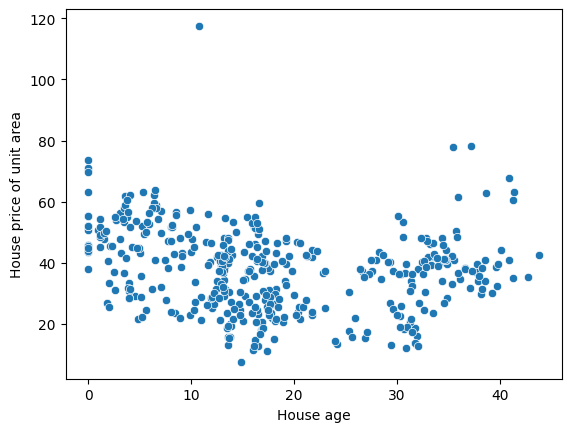

In [34]:
sns.scatterplot(x=real_estate_df["House age"],y=real_estate_df["House price of unit area"])
plt.show()

In [41]:
# outlier handling of Target feature
Q1=real_estate_df["House price of unit area"].quantile(0.25)
Q3=real_estate_df["House price of unit area"].quantile(0.75)
median=real_estate_df["House price of unit area"].median()

In [42]:
IQR=Q3-Q1
print(IQR)

18.900000000000002


In [43]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
print(lower_fence)
print(higher_fence)

-0.6500000000000021
74.95


In [44]:
real_estate_df[real_estate_df["House price of unit area"]>higher_fence]

,House age,Distance to nearest MRT station,Convenience Stores nearby,Latitude,Longitude,House price of unit area
220,37.2,186.5101,9,24.97703,121.54265,78.3
270,10.8,252.5822,1,24.97460,121.53046,117.5
312,35.4,318.5292,9,24.97071,121.54069,78.0


In [45]:
real_estate_df[real_estate_df["House price of unit area"]<lower_fence]

,House age,Distance to nearest MRT station,Convenience Stores nearby,Latitude,Longitude,House price of unit area


In [46]:
real_estate_df.drop(index=[220,270,312],axis=0,inplace=True)

In [47]:
real_estate_df.shape

(411, 6)

In [48]:
real_estate_df[real_estate_df["House price of unit area"]>higher_fence]

,House age,Distance to nearest MRT station,Convenience Stores nearby,Latitude,Longitude,House price of unit area


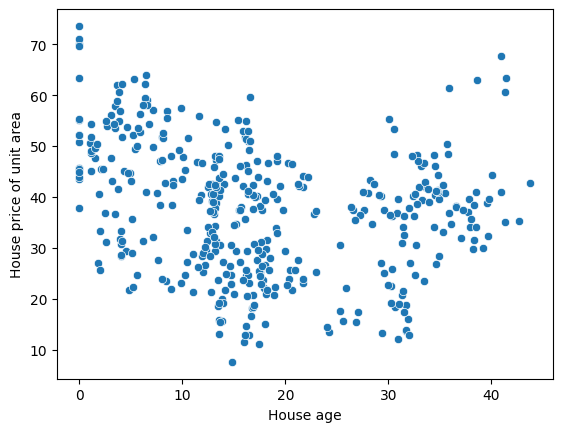

In [49]:
sns.scatterplot(x=real_estate_df["House age"],y=real_estate_df["House price of unit area"])
plt.show()

In [50]:
real_estate_df.head()

,House age,Distance to nearest MRT station,Convenience Stores nearby,Latitude,Longitude,House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


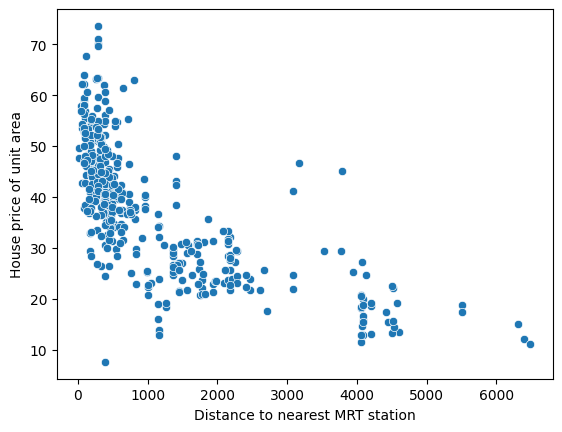

In [51]:
sns.scatterplot(x=real_estate_df["Distance to nearest MRT station"],y=real_estate_df["House price of unit area"])
plt.show()

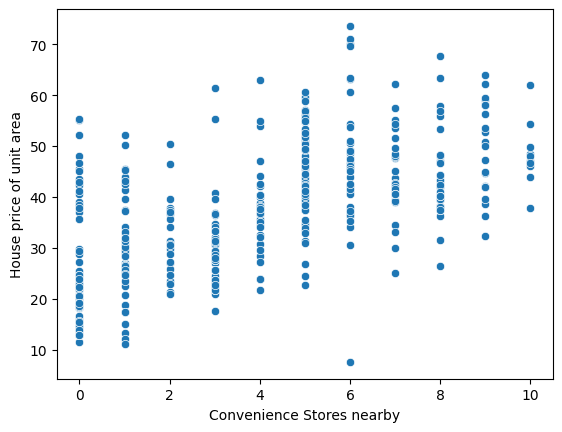

In [52]:
sns.scatterplot(x=real_estate_df["Convenience Stores nearby"],y=real_estate_df["House price of unit area"])
plt.show()

In [53]:
real_estate_df.drop(labels=["Convenience Stores nearby"],axis=1,inplace=True)

In [54]:
real_estate_df.head()

,House age,Distance to nearest MRT station,Latitude,Longitude,House price of unit area
0,32.0,84.87882,24.98298,121.54024,37.9
1,19.5,306.59470,24.98034,121.53951,42.2
2,13.3,561.98450,24.98746,121.54391,47.3
3,13.3,561.98450,24.98746,121.54391,54.8
4,5.0,390.56840,24.97937,121.54245,43.1


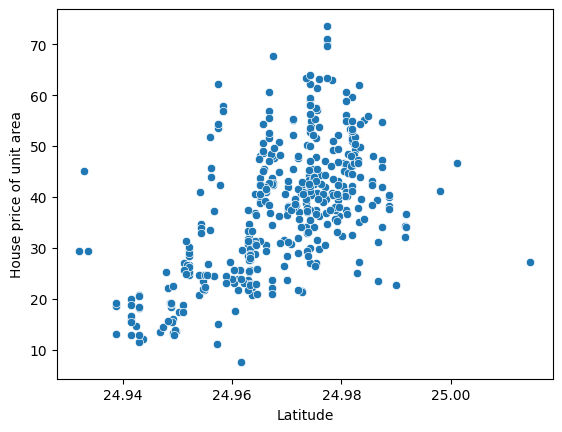

In [55]:
sns.scatterplot(x=real_estate_df["Latitude"],y=real_estate_df["House price of unit area"])
plt.show()

In [56]:
# outlier handling of latitude
Q1=real_estate_df["Latitude"].quantile(0.25)
Q3=real_estate_df["Latitude"].quantile(0.75)
median=real_estate_df["Latitude"].median()
IQR=Q3-Q1
print(IQR)

0.014714999999998923


In [57]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
print(lower_fence)
print(higher_fence)

24.940917500000005
24.9997775


In [63]:
real_estate_df[real_estate_df["Latitude"]<lower_fence]

,House age,Distance to nearest MRT station,Latitude,Longitude,House price of unit area


In [59]:
real_estate_df.drop(index=[35,228],axis=0,inplace=True)

In [62]:
real_estate_df.drop(index=[117,148,194,320,329,382],axis=0,inplace=True)

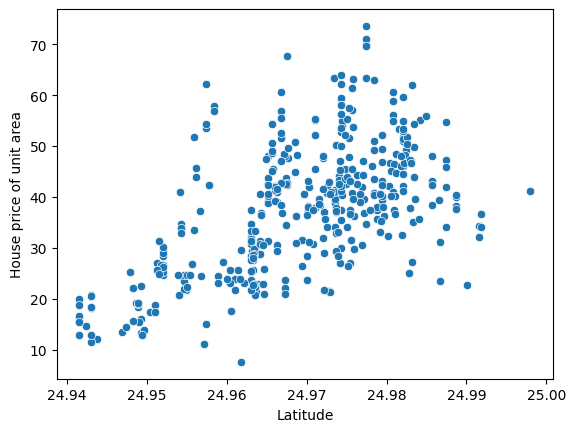

In [64]:
sns.scatterplot(x=real_estate_df["Latitude"],y=real_estate_df["House price of unit area"])
plt.show()

In [65]:
real_estate_df.head()

,House age,Distance to nearest MRT station,Latitude,Longitude,House price of unit area
0,32.0,84.87882,24.98298,121.54024,37.9
1,19.5,306.59470,24.98034,121.53951,42.2
2,13.3,561.98450,24.98746,121.54391,47.3
3,13.3,561.98450,24.98746,121.54391,54.8
4,5.0,390.56840,24.97937,121.54245,43.1


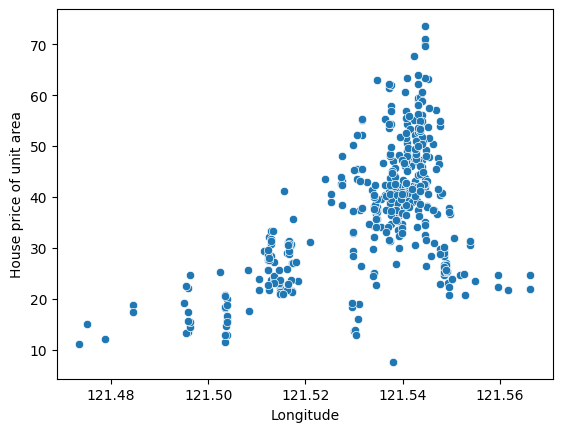

In [66]:
sns.scatterplot(x=real_estate_df["Longitude"],y=real_estate_df["House price of unit area"])
plt.show()

In [69]:
# outlier handling of longitude
Q1=real_estate_df["Longitude"].quantile(0.25)
Q3=real_estate_df["Longitude"].quantile(0.75)
median=real_estate_df["Longitude"].median()
IQR=Q3-Q1
print(IQR)

0.013655000000014184


In [70]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
print(lower_fence)
print(higher_fence)

121.50934249999997
121.56396250000003


In [71]:
real_estate_df[real_estate_df["Longitude"]>higher_fence]

,House age,Distance to nearest MRT station,Latitude,Longitude,House price of unit area
187,8.9,3078.176,24.95464,121.56627,22.0
307,10.3,3079.890,24.95460,121.56627,24.7


In [73]:
real_estate_df.drop(index=[187,307],inplace=True)

In [74]:
real_estate_df.head()

,House age,Distance to nearest MRT station,Latitude,Longitude,House price of unit area
0,32.0,84.87882,24.98298,121.54024,37.9
1,19.5,306.59470,24.98034,121.53951,42.2
2,13.3,561.98450,24.98746,121.54391,47.3
3,13.3,561.98450,24.98746,121.54391,54.8
4,5.0,390.56840,24.97937,121.54245,43.1


In [75]:
real_estate_df.shape

(401, 5)

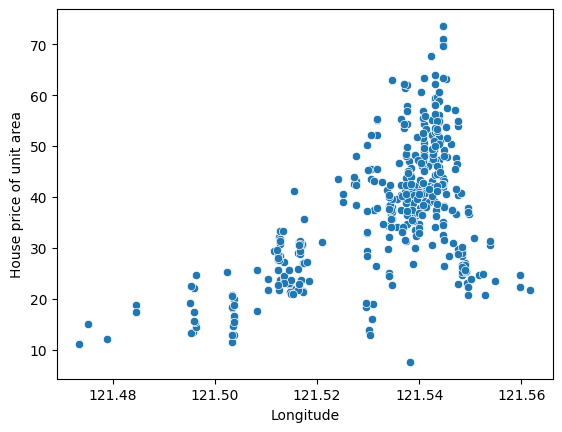

In [76]:
sns.scatterplot(x=real_estate_df["Longitude"],y=real_estate_df["House price of unit area"])
plt.show()

In [77]:
# independent and dependent variables
X=real_estate_df.iloc[:,:-1]
Y=real_estate_df.iloc[:,-1]

In [80]:
# train and test split 
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [82]:
X_train.shape

(300, 4)

In [83]:
X_test.shape

(101, 4)

In [84]:
# standardization
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [85]:
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [88]:
# model training 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [110]:
poly_features=PolynomialFeatures(degree=3,include_bias=True)
lin_reg=LinearRegression(n_jobs=-1)

In [111]:
poly_reg=Pipeline([
    ("poly_features",poly_features),
    ("lin_reg",lin_reg)
])

In [112]:
poly_reg.fit(X_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('lin_reg', LinearRegression(n_jobs=-1))])

In [113]:
y_pred=poly_reg.predict(X_test)

In [114]:
# check accuracy
from sklearn.metrics import r2_score

acc_score=r2_score(y_true=y_test,y_pred=y_pred)
print(acc_score)

0.6662605708984702


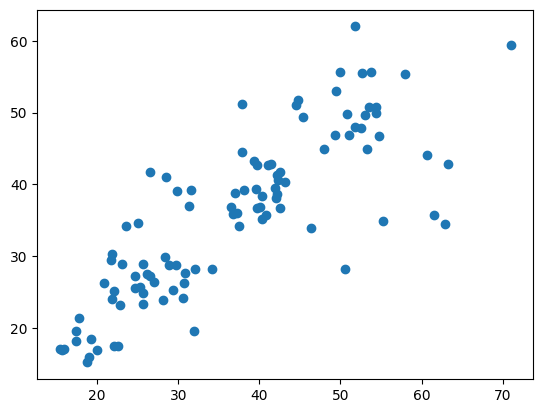

In [115]:
plt.scatter(x=y_test,y=y_pred)
plt.show()